# Steam Games Dataset 2021-2025 (65k+)
Ссылка на оригинальный датасет: https://www.kaggle.com/datasets/jypenpen54534/steam-games-dataset-2021-2025-65k



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jypenpen54534/steam-games-dataset-2021-2025-65k")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\chest\.cache\kagglehub\datasets\jypenpen54534\steam-games-dataset-2021-2025-65k\versions\4


In [2]:
import pandas as pd

df = pd.read_csv(path + '\\a_steam_data_2021_2025.csv')
df.head(5)

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues


При EDA стоит смотреть общую информацию в колонках, например количество игр всего(повторяющиеся айди)
Количество уникальных разработчиков и издателей
Максимальное минимальное и среднее цен, т.к есть бесплатные игры их количество относительно всех записей.

Например, на графике ниже видим, что цены растут вплоть до 1750

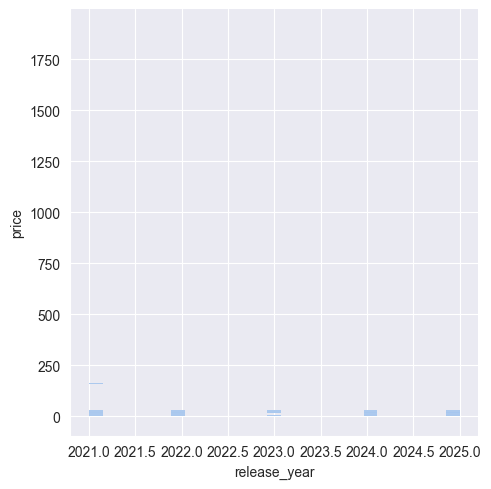

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df, x='release_year',y='price')

Если посмотреть средние значения цен и количество настолько высоких значений, можно увидеть что их не так много

In [4]:
# Игр больше 250 долларов всего 5, никто их не рекомендовал
high_price_games = df.loc[df['price'] > 200]
high_price_games.head()

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
858,3013840,True Love,2024,"Jun 27, 2024",Action;Adventure;Casual;Indie,Single-player;Family Sharing,500.00,0,A Guy,Whoes heart broken
16130,3822960,Zekertune,2025,"Jul 4, 2025",Casual,Single-player;Steam Achievements;Family Sharing,615.38,0,Zekertopia,Zekertopia
33591,2504210,The Leverage Game Business Edition,2023,"Aug 26, 2023",Indie;Simulation,Single-player;Multi-player;PvP;Family Sharing,999.98,0,A&S Inc.,A&S Inc.
34838,2499620,The Leverage Game,2023,"Aug 25, 2023",Indie;Simulation,Single-player;Multi-player;PvP;Online PvP;Fami...,999.98,0,A&S Inc.,A&S Inc.
62600,2691920,MolCollabo v2,2025,"Feb 3, 2025",Indie,Single-player;Multi-player;Tracked Controller ...,1900.00,0,FiatLux Corporatoin,FiatLux Corporatoin


In [5]:
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f'Средняя цена игр: {mean_price}, Медианная цена: {median_price}')

Средняя цена игр: 7.204043283832664, Медианная цена: 3.99


Предположим, что игры с высокой ценой мы удалим, что делать с бесплатными играми?


In [6]:
# Здесь условие внутри скобок трактуется как true, false, т.е как 1 и 0. Строки, где условие True будут иметь 1, поэтому сложение даст нужное количество строк
# Можно и просто отфильтровать по этому условию и посмотреть shape[0]
(df['price'] == 0).sum()

np.int64(11962)

Всего в датасете 65 тысяч значений, 12 тысяч из них - это большой объем данных чтобы его просто выбросить. Можно представить колонку с ценой как несколько классов(бесплатные игры, по низкой цене, средней и тд), тем самым сохраним записи.

Проделаем то, что обсудили выше относительно цены.

Цены выше 200 удаляем, пустые цены если они есть заполняем нулем и делим колонку на несколько классов.

In [7]:
# Удаляем цены выше 200
df = df[df['price'] < 200]

In [8]:
# Заменяем цены с числовых значений на классы
df['price'] = df['price'].fillna(0)
def price_classes(price):
    if price == 0:
        return 'Free'
    elif price < 10:
        return 'Low (0-10)'
    elif price < 30:
        return 'Mid (10-30)'
    elif price < 70:
        return 'High (30-70)'
    else:
        return 'Premium (70+)'

df['price_classes'] = df['price'].apply(price_classes)

In [9]:
df.head(5)

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher,price_classes
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios,Low (0-10)
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios,Low (0-10)
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames,Mid (10-30)
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ,Mid (10-30)
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues,Low (0-10)


Теперь можем удалить колонку с ценами

In [10]:
df = df.drop('price', axis=1)

In [11]:
# Есть отдельная колонка с годом релиза и колонка с датой релиза, которая так же содержит год.
# Можно оставить месяц от release_date
df['release_date'].value_counts()

release_date
2025             836
Q4 2025          355
December 2025    209
Oct 23, 2025     150
Jun 19, 2025     139
                ... 
Jan 17, 2021       2
Dec 28, 2025       2
Dec 20, 2025       1
Dec 13, 2025       1
Jun 13, 2021       1
Name: count, Length: 1828, dtype: int64

In [12]:
# "можно" было бы оставить, если бы не было ситуации, когда часть значений не содержит месяца как такового
# для начал удалим значения без полноценной даты, к этому можно вернуться потом.
df = df[~((df['release_date'] == 'Q4 2025') | (df['release_date'] == '2025'))]

In [13]:
# Значение 'December 2025' содержит достаточно информации для работы, приведем её к общему виду
df['release_date'] = df['release_date'].replace({'December 2025': 'Dec 01, 2025'})

In [14]:
# Теперь можем привести к datetime и оставить из колонки только месяц
df['release_date'] =  pd.to_datetime(df['release_date'])
df['relaase_month'] = df['release_date'].dt.month
df = df.drop('release_date', axis=1)

In [15]:
df.head(5)

,appid,name,release_year,genres,categories,recommendations,developer,publisher,price_classes,relaase_month
0,3057270,Seafarer's Gambit,2024,Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,0,Bouncy Rocket Studios,Bouncy Rocket Studios,Low (0-10),7
1,3822840,Capitalist Misadventures,2025,Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,0,Caramelo Studios,Caramelo Studios,Low (0-10),7
2,3216640,The Beast and the Princess,2025,Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,0,Libragames,Libragames,Mid (10-30),6
3,2403620,Air Twister,2023,Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,0,YS Net,ININ,Mid (10-30),11
4,1538040,Horde Slayer,2021,Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,0,Wagner Rodrigues,Wagner Rodrigues,Low (0-10),3


In [16]:
# Жанры и категории хранятся списком в одной колонке.
# Для начала было бы неплохо понять размах, сколько разных значений в целом бывает в колонке,
# К скольки бинарным колонкам это приведет
# Опять же можно было бы, если бы не было пустых значений.
df['genres'].isna().sum()

np.int64(66)

In [17]:
# Пустые значения заполним как 'Not specified'
df['genres'] = df['genres'].fillna('Genre not specified')

In [18]:
# Для представления признаков как бинарных можно использовать get_dummies pandas
dummies = df['genres'].str.get_dummies(sep=';')
df = df.join(dummies)

In [19]:
df.head(5)

,appid,name,release_year,genres,categories,recommendations,developer,publisher,price_classes,relaase_month,...,Massively Multiplayer,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,3057270,Seafarer's Gambit,2024,Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,0,Bouncy Rocket Studios,Bouncy Rocket Studios,Low (0-10),7,...,0,1,0,0,0,0,1,0,0,0
1,3822840,Capitalist Misadventures,2025,Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,0,Caramelo Studios,Caramelo Studios,Low (0-10),7,...,0,0,0,1,0,0,1,0,0,0
2,3216640,The Beast and the Princess,2025,Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,0,Libragames,Libragames,Mid (10-30),6,...,0,0,0,0,0,0,1,0,0,0
3,2403620,Air Twister,2023,Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,0,YS Net,ININ,Mid (10-30),11,...,0,0,0,0,0,0,0,0,0,0
4,1538040,Horde Slayer,2021,Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,0,Wagner Rodrigues,Wagner Rodrigues,Low (0-10),3,...,0,1,0,0,0,0,0,0,0,0


In [20]:
# Аналогично для категорий
df['categories'].isna().sum()

np.int64(6)

In [21]:
df['categories'] = df['categories'].fillna('Cat Not specified')

In [22]:
dummies_cat = df['categories'].str.get_dummies(sep=';')
df = df.join(dummies_cat)

In [23]:
# Дропнем колонки жанров и категорий
df = df.drop(['genres', 'categories'], axis=1)

In [24]:
df.shape

(64325, 86)

In [25]:
df.head(5)

,appid,name,release_year,recommendations,developer,publisher,price_classes,relaase_month,Accounting,Action,...,Steam Turn Notifications,Steam Workshop,Stereo Sound,Subtitle Options,Surround Sound,Touch Only Option,Tracked Controller Support,VR Only,VR Support,VR Supported
0,3057270,Seafarer's Gambit,2024,0,Bouncy Rocket Studios,Bouncy Rocket Studios,Low (0-10),7,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3822840,Capitalist Misadventures,2025,0,Caramelo Studios,Caramelo Studios,Low (0-10),7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3216640,The Beast and the Princess,2025,0,Libragames,Libragames,Mid (10-30),6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2403620,Air Twister,2023,0,YS Net,ININ,Mid (10-30),11,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1538040,Horde Slayer,2021,0,Wagner Rodrigues,Wagner Rodrigues,Low (0-10),3,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#appid врятли принесет пользу,так же дропнем
df = df.drop('appid', axis=1)

In [27]:
# Колонки с названием игры, разработчиком и паблишером строковые, но если их все создать как бинарные получится очень много.
# Колонка с названием не несет как категория смысла вообще.
df['developer'].value_counts()

developer
EroticGamesClub          215
Bully Revenge Studios    119
Gamesforgames             96
Do Games Limited          90
Archor Wright             88
                        ... 
Sky9 Games                 1
Biro Pivo                  1
KIKI GAMES                 1
Xennial Digital            1
Rylan Yancey               1
Name: count, Length: 44740, dtype: int64

In [28]:
df['publisher'].value_counts()

publisher
EroticGamesClub                       215
BFG Entertainment                     172
8floor                                150
Hede                                  142
Kagura Games                          119
                                     ... 
EXNOA LLC;Spike Chunsoft Co., Ltd.      1
Tlantico Studio                         1
Chris Baum                              1
Josh Sellers                            1
Taylor Conolley                         1
Name: count, Length: 40692, dtype: int64

In [29]:
print(df['developer'].isna().sum())
print(df['publisher'].isna().sum())

53
183


In [30]:
# Название игры так же пока дропнем, есть смысл его обработать как текстовой признак если качество того потребует.
df = df.drop('name', axis=1)

In [31]:
# Категориальные фичи обработает Catboost, заполним там пропуски
df['developer'] = df['developer'].fillna('Not specified')
df['publisher'] = df['publisher'].fillna('Not specified')

In [32]:
df.head(5)

,release_year,recommendations,developer,publisher,price_classes,relaase_month,Accounting,Action,Adventure,Animation & Modeling,...,Steam Turn Notifications,Steam Workshop,Stereo Sound,Subtitle Options,Surround Sound,Touch Only Option,Tracked Controller Support,VR Only,VR Support,VR Supported
0,2024,0,Bouncy Rocket Studios,Bouncy Rocket Studios,Low (0-10),7,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2025,0,Caramelo Studios,Caramelo Studios,Low (0-10),7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2025,0,Libragames,Libragames,Mid (10-30),6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2023,0,YS Net,ININ,Mid (10-30),11,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,0,Wagner Rodrigues,Wagner Rodrigues,Low (0-10),3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Выделим таргет
X = df.drop(columns=['price_classes'])
y = df['price_classes']

In [34]:
# Разделим на трейн и тест
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Learning rate set to 0.116831
0:	learn: 0.7763094	test: 0.7778586	best: 0.7778586 (0)	total: 279ms	remaining: 4m 38s
1:	learn: 0.7752167	test: 0.7769794	best: 0.7778586 (0)	total: 391ms	remaining: 3m 15s
2:	learn: 0.7757528	test: 0.7786000	best: 0.7786000 (2)	total: 509ms	remaining: 2m 49s
3:	learn: 0.7785742	test: 0.7789611	best: 0.7789611 (3)	total: 628ms	remaining: 2m 36s
4:	learn: 0.7815050	test: 0.7803984	best: 0.7803984 (4)	total: 740ms	remaining: 2m 27s
5:	learn: 0.7826202	test: 0.7833216	best: 0.7833216 (5)	total: 851ms	remaining: 2m 20s
6:	learn: 0.7844326	test: 0.7853611	best: 0.7853611 (6)	total: 960ms	remaining: 2m 16s
7:	learn: 0.7850370	test: 0.7847946	best: 0.7853611 (6)	total: 1.07s	remaining: 2m 12s
8:	learn: 0.7857418	test: 0.7850809	best: 0.7853611 (6)	total: 1.19s	remaining: 2m 10s
9:	learn: 0.7861047	test: 0.7860383	best: 0.7860383 (9)	total: 1.3s	remaining: 2m 8s
10:	learn: 0.7855556	test: 0.7854935	best: 0.7860383 (9)	total: 1.41s	remaining: 2m 6s
11:	learn: 0.78

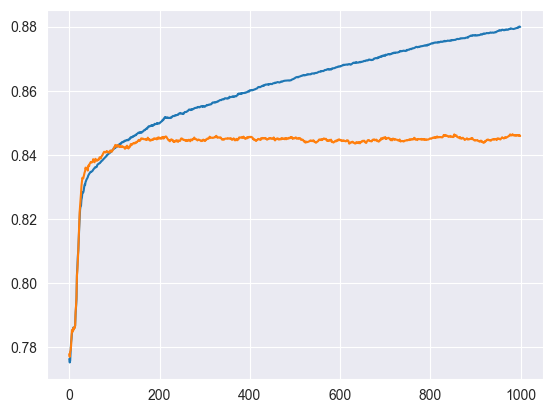

In [35]:
from catboost import CatBoostClassifier
cat_features = ['developer', 'publisher']

model = CatBoostClassifier(
    loss_function='MultiClass',
    eval_metric='TotalF1',
)
model.fit(X_train, y_train,cat_features=cat_features, eval_set=(X_test, y_test), use_best_model=True)

loss = model.get_evals_result()
plt.plot(loss['learn']['TotalF1'])
plt.plot(loss['validation']['TotalF1'])
plt.show()

In [36]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F-мера: {f1:.2F}')

F-мера: 0.85


Цитируя:
F1 — это гармоническое среднее precision и recall.
F1 = 0.85 означает:

- модель довольно редко ошибается, когда предсказывает класс (precision высокий)
 - и не пропускает много объектов нужных классов (recall высокий)